Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   


# Python aplicado à análise de estruturas
---
## <center> Aula 5: Aplicação: Resolução de uma treliça plana</center>

[1. Fundamentação teórica](#section_1)

[1.1. Matriz de rigidez de uma treliça plana](#section_11)

[1.2. Montagem da matriz de rigidez global da estrutura](#section_12)

[1.3. Montagem do vetor de forças externas](#section_13)

[1.4. Aplicação das condições de contorno ](#section_14)

[1.5. Cálculo dos deslocamentos ](#section_15)

[1.6. Determinação das reações de apoio ](#section_16)

[1.7. Determinação dos esforços em cada barra ](#section_17)

[2. Introdução ](#section_2)

[2.1. Estrutura em estudo ](#section_21)

[3. Entrada de dados ](#section_3)

[4. Plotagem da estrutura ](#section_4)

[5. Comprimento das barras e cossenos diretores ](#section_5)

[6. Montagem da matriz de rigidez ](#section_6)

[7. Aplicação das condições de contorno ](#section_7)

[8. Montagem do vetor de forças  ](#section_8)

[9. Resolução da equação de equilíbrio ](#section_9)

[10. Plotagem da treliça deformada ](#section_10)

[11. Plotagem das reações de apoio ](#section_111)

[12. Determinação dos esforços ](#section_112)



---

_Eng.Msc Eduarto Pagnussat Titello_

_Eng.Daniel Barbosa M. Matos_

# Fundamentação teórica. <a name="section_1"></a>

Nesta sessão serão apresentados todos os conceitos necessários de análise matricial de estruras para o compreendimento e realização da aplicação prática.

## Matriz de rigidez de uma barra de treliça plana.<a name="section_11"></a>

A análise de estruturas por elementos de barra é o princípio do ** método dos elmentos finitos**, sendo a barra de treliça plana o elemento finito mais simples, que sofre apenas carregamentos axiais em torno dos seus eixos locais, como mostrado na figura abaixo.

![sistema_local.PNG](Resources/sistema_local.PNG)

Num sistema local, a barra de treliça plana possui apenas um grau de liberdade (gdl) por nó, tendo sua matriz de rigidez expressa por:

\begin{align}
K_l^l = \frac{EA}{L}
\begin{bmatrix}
1&-1\\
-1&1
\end{bmatrix}
\end{align}

A partir do momento em que se deseja realizar uma análise global da estrutura, é necessário reescrever a matriz de rigidez local de forma que essa possua um grau de liberdade por eixo do espaço adotado. Isso ocorre porque devem existir graus de liberdade suficientes para a correta decomposição dos deslocamentos de todos os nós, indiferentemente da orientação das barras. Dessa forma, em uma treliça plana devem haver 2 graus de liberdade, o gdl de translação horizontal (x) e o gdl de translação vertical (y), conforme a figura a seguir:

![sistema.PNG](Resources/sistema.PNG)

Adotando o eixo x' (local) sobre o eixo da barra (conforme figura anterior), a matriz local, considerando o grau de liberdade adicional y' perpendicular ao eixo x', tem a seguinte configuração, que não altera suas propriedades. 

\begin{align}
K_l^l = \frac{EA}{L}
\begin{bmatrix}
1&0&-1&0\\
0&0&0&0\\
-1&0&1&0\\
0&0&0&0
\end{bmatrix}
\end{align}

Perceba que, para transformar as coordenadas globais em coordendadas locais, podem-se usar as seguintes equações:

\begin{align}
u_{i'} &= u_i\cos{\theta} + v_i\sin{\theta} \\
v_{i'} &= -u_i\sin{\theta} + v_i\cos{\theta} \\
u_{j'} &= u_j\cos{\theta} + v_j\sin{\theta} \\
v_{j'} &= -u_j\sin{\theta} + v_j\cos{\theta} 
\end{align}

Colocando o sistema de equações acima em forma matricial, tem-se o exposto abaixo:

\begin{align}
\begin{bmatrix}
u_{i'}  \\
v_{i'}  \\
u_{j'}  \\
v_{j'}
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta&\sin\theta&0&0 \\
-\sin\theta&cos\theta&0&0 \\
0&0&\cos\theta&\sin\theta \\
0&0&-\sin\theta&\cos\theta
\end{bmatrix} 
\begin{bmatrix}
u_{i} \\
v_{i} \\
u_{j}  \\
v_{j}
\end{bmatrix}
\end{align}
Ou ainda:
\begin{align}
U^l = \Theta U^G
\end{align}

Em que $\Theta$ é chamada de matriz de rotação.

\begin{align}
\Theta = 
\begin{bmatrix}
\cos\theta&\sin\theta&0&0\\
-\sin\theta&cos\theta&0&0\\
0&0&\cos\theta&\sin\theta\\
0&0&-\sin\theta&\cos\theta
\end{bmatrix}
\end{align}

Escrevendo, agora, as equações de equilíbrio local (de uma barra de treliça plana) e equilibrio global (de toda estrutura), temos:

\begin{align}
K_l^L U^l = F^l \\
K^G U^G = F^G
\end{align}


Sabendo que o vetor de forças globais $F_G$ pode ser escrito como 

\begin{align}
F^G = \Theta^T F^l
\end{align}

E utilizando a relação entre deslocamentos locais e globais,é possível reescrever a equação de equilíbrio multiplicando ambos os lados pelo transposto da matriz de rotação:

\begin{align}
\Theta^T K_l^L \Theta U^G &= \Theta^TF^l\\
K_l^G U^G &= F^G
\end{align}

Sendo possível afirmar que a matriz de rigidez em coordendas globais pode ser expressa por:
\begin{align}
K_l^G = \Theta^T K_l^L \Theta
\end{align}

## Montagem da matriz de rigidez global da estrutura<a name="section_12"></a>

A matriz de rigidez total da estrutura é uma matriz que comtempla todos os graus de liberdade das barras utilizadas, sendo necessário o correto acoplamento dos mesmos. Abaixo será realizado um exemplo de como deve ser realizado este procedimento.

![exemplo.PNG](Resources/exemplo.PNG)

Neste exemplo é possível verificar a presença de 4 barras de treliça plana, 4 nós e 8 gdl (2 por nó). A numeração dos graus de liberdade é feita nó a nó, onde a direção x tem o primeiro gdl do nó e a direção y o segundo, dessa forma, a numeração dos gdls para o nó n é dada por:
\begin{align}
gdl_h &= 2n-1\\
gdl_v &= 2n
\end{align}
Montando as matrizes de rigidez locais (já rotacionadas) de cada um dos elementos temos:
\begin{matrix}
& & & & & &1& 2& 3& 4\\
\end{matrix}
\begin{align}
K_1 &= \frac{29.5* 10^6}{40}
\begin{bmatrix}
1&0&-1&0\\
0&0&0&0\\
-1&0&1&0\\
0&0&0&0
\end{bmatrix}
\begin{matrix}
1\\
2\\
3\\
4
\end{matrix}
\end{align}
\begin{matrix}
& & & & &5&6&3&4\\
\end{matrix}
\begin{align}
K_2 &= \frac{29.5 *10^6}{30}
\begin{bmatrix}
0&0&0&0\\
0&1&0&-1\\
-1&0&1&0\\
0&-1&0&1
\end{bmatrix}
\begin{matrix}
5\\
6\\
3\\
4
\end{matrix}
\end{align}
\begin{matrix}
&  & & & &1& &2& &5& &6\\
\end{matrix}
\begin{align}
K_3 &= \frac{29.5 *10^6}{50}
\begin{bmatrix}
.64&.48&-.64&-.48\\
.48&.36&-.48&-.36\\
.48&-.36&.48&.36\\
0&0&0&0
\end{bmatrix}
\begin{matrix}
1\\
2\\
5\\
6
\end{matrix}
\end{align}
\begin{matrix}
& & & & & &7&8&5&6\\
\end{matrix}
\begin{align}
K_4 &= \frac{29.5* 10^6}{40}
\begin{bmatrix}
1&0&-1&0\\
0&0&0&0\\
-1&0&1&0\\
0&0&0&0
\end{bmatrix}
\begin{matrix}
7\\
8\\
5\\
6
\end{matrix}
\end{align}


Perceba que cada linha e coluna estão numeradas conforme o seu grau de liberdade correspondente.

As matrizes locais serão agora alocadas na matriz global(8x8) conforme os seus graus de liberdade. Caso haja a superposição de valores, esses devem ser somados.
\begin{matrix}
& & & & &  &  1 \qquad & 2\quad  & 3\qquad & 4\quad  & 5\quad  & 6\qquad  & 7\quad  & 8 \\
\end{matrix}
\begin{align}
K = \frac{29.5*10^6}{600}
\begin{bmatrix}
22.68 & 5.76 & -15 & 0 & -7.68 & -5.76 & 0& 0 \\
5.76 & 4.32 & 0 & 0 & -5.76 & -4.32 & 0 & 0\\
-15 & 0 &15 & 0 &0 & 0& 0 & 0\\
0& 0 & 0 & 20& 0 & -20 & 0 & 0\\
-7.68 & -5.76 & 0 & 0 & 22.68 & 5.76 & -15&0 \\
-5.76 & -4.32&0 & -20 & 5.76 & 24.32 & 0&0\\
0 & 0 & 0 & 0 & -15 & 0 & 15 & 0\\
0 & 0 & 0 & 0 & 0 & 0& 0& 0
\end{bmatrix}
\begin{matrix}
1\\
2\\
3\\
4\\
5\\
6\\
7\\
8\\
\end{matrix}
\end{align}

De forma genérica, podemos acoplar as matrizes locais na matriz global na forma de quadrantes, ao invés de acopla-las termo a termo, visto que cada nó (quadrante) tem 2 gdls em sequencia.
\begin{align}
K_l^G &= 
\begin{bmatrix}
k_{ii} & k_{ij}\\
k_{ji} & k_{jj}
\end{bmatrix}\\
K &= 
\begin{bmatrix}
k_{ii} &\dots& k_{ij}\\
\vdots  & \ddots & \vdots \\
k_{ji} &\dots & k_{jj}
\end{bmatrix}
\end{align}






## Montagem do vetor de forças externas<a name="section_13"></a>

O vetor de forças externas deve possuir dimensões n x 1, em que n é a quantidade de graus de liberdade. Dessa forma a posição de um valor no vetor corresponde ao seu gdl (as linhas com numeração ímpar correspondem aos gdl horizontais, enquanto as linhas com numeração par estão relacionadas aos gdl verticais). Montando o vetor de forças para o exemplo acima, temos:

\begin{align}
F^G =
\begin{bmatrix}
0\\
0\\
20000\\
0\\
0\\
-25000\\
0\\
0\\
\end{bmatrix}
\begin{matrix}
1\\
2\\
3\\
4\\
5\\
6\\
7\\
8\\
\end{matrix}
\end{align}

## Aplicação das condições de contorno<a name="section_14"></a>

Para a aplicação das condições de contorno existem duas possibilidades: a remoção das linhas e as colunas dos graus de liberdade restritos ou a substituição dessas linhas e colunas por zeros, mantendo 1 na diagonal principal. A primeira metodologia apresenta vantagens em relação ao processamento da estrutura, reduzindo as dimensões da matriz, enquanto a implementação da segunda é de maior facilidade, sendo essa aqui abordada.  

\begin{align}
K_R &= \frac{29.5*10^6}{600}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0& 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0& 0 \\
0 & 0 &15 & 0 &0 & 0& 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0& 0 \\
0 & 0 & 0 & 0 & 22.68 & 5.76 & 0 &0 \\
0 & 0 &0 & 0 & 5.76 & 24.32 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0& 0 
\end{bmatrix}
\begin{matrix}
1\\
2\\
3\\
4\\
5\\
6\\
7\\
8\\
\end{matrix}
\end{align}

## Cálculo dos deslocamentos<a name="section_15"></a>

Para a realização do cálculo dos deslocamentos, basta resolver o sistema de equações:

\begin{align}
K_R U = F^G
\end{align}

## Determinação das reações de apoio<a name="section_16"></a>

Agora em posse dos deslocamentos (U), ao realizar o produto da matriz de rigidez sem restrições pelo vetor deslocamento ($KU$), o vetor de forças resultante($F^G$) possuirá valores referentes aos graus de liberdade restritos, sendo esses os valores das reações de apoio.

## Determinação dos esforços em cada barra<a name="section_17"></a>

Para a determinação dos esforços atuantes em cada barra, devemos resolver a equação de equilíbrio local de cada barra. Para isso, será necessário a utilização da matriz de rigidez local da barra ($K_l^l$) e do deslocamento de cada nó da barra em coordenadas locais ($U^l$). Para realizar a conversão do deslocamento global para o local, utilizaremos novamente a expressão $ U^l = \Theta U^G $. Portanto, para o cálculo dos esforços, basta resolver o sistema abaixo:

\begin{align}
K_l^l U^l = F^l
\end{align}



# Introdução<a name="section_2"></a>

A análise matricial de treliças requer a criação de arrays que nos permitem modelar a estrutura de forma matemática. São necessárias:

* array de coordendas nodais: coordenadas `X` e `Y`;
* array de conectividade: contendo os nós que delimitam cada barra;
* array de propriedades: contendo a área e o módulo de elasticidade longitudinal;
* array de forças externas : contendo os valores de forças horizontais e verticais;
* array de restrições : contendo os graus de liberdade que são restritos.

Para criação dessas arrays os dados serão importados através do módulo `pandas` de planilha do Excel chamada `entrada.xlsx`. A planilha de entrada de dados deve ter duas abas, a primeira chamada de `Nós` contendo as coordenadas de cada nó e a segunda chamada `Barras` com as conectividades (nó inicial e final) e as propriedades de cada barra. 


## Estrutura em estudo<a name="section_21"></a>

A estrutura em estudo é uma treliça plana com 12 nós, 21 barras e 2 gdl por nó. As coordenadas dos nós e os elementos podem ser visualizadas na figura.

![treliça](Resources/treliça.PNG)

Todas as barras possuem a mesma área de seção transversal $ A = 0.01 m^2$ e o mesmo módulo de elasticidade $E = 21 * 10^{10} \frac{N}{m^2}$.

Vamos então importar os módulos necessários:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Entrada de dados<a name="section_3"></a>
Conforme apresentado anteriormente a entrada de dados é realizada através do arquivo `entrada.xlsx`. Vamos então importar cada aba separadamente especificando o `keyarg` `sheet_name`.

In [2]:
nos = pd.read_excel('resources/entrada.xlsx', sheet_name='Nós')
barras = pd.read_excel('resources/entrada.xlsx', sheet_name='Barras')

# Acertando os números dos nós e das barras conforme a figura (iniciando em 1)
nos.index += 1
barras.index += 1

# Trocando celulas vazias por zeros
nos.fillna(0, inplace=True)

# Printando os valores na tela
nos

,X,Y,RX,RY,FX,FY
1,0,0,1.0,1.0,0.0,0.0
2,2,1,0.0,0.0,8000.0,-9000.0
3,2,0,0.0,0.0,0.0,0.0
4,4,2,0.0,0.0,8000.0,-9000.0
5,4,0,0.0,0.0,0.0,0.0
6,6,3,0.0,0.0,0.0,-15000.0
7,6,0,0.0,0.0,0.0,0.0
8,8,2,0.0,0.0,-8000.0,-9000.0
9,8,0,0.0,0.0,0.0,0.0
10,10,1,0.0,0.0,-8000.0,-9000.0


In [3]:
barras

,N1,N2,A,E
1,1,2,0.01,210000000000
2,1,3,0.01,210000000000
3,2,3,0.01,210000000000
4,2,4,0.01,210000000000
5,2,5,0.01,210000000000
6,3,5,0.01,210000000000
7,4,5,0.01,210000000000
8,4,6,0.01,210000000000
9,4,7,0.01,210000000000
10,5,7,0.01,210000000000


# Plotagem da estrutura<a name="section_4"></a>

O código abaixo permite a montagem da estrutura plotando elemento a elemento a partir das matrizes das barras e dos nós 
.

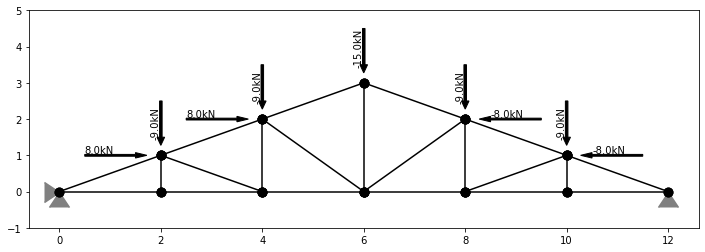

In [4]:
plt.figure(1,figsize=(12,4))
plt.ylim(-1,5)

# Plotagem dos apoios e das forças
for no in nos.index:
    X,Y,RX,RY,Fx,Fy = nos.loc[no]

    # Se RX restrito aplica sobre gl de X
    if RX == 1:
        plt.scatter(X,Y,400,marker =5,zorder = -2,color ='gray')
    if RY == 1:
        plt.scatter(X,Y,400,marker =6,zorder = -2,color ='gray')

    if Fx >0:
        plt.arrow(X-1.5,Y,1,0,width =0.05,color='k')
        plt.text(X-1.5,Y,'{}kN'.format(Fx/1000),va='bottom')
    if Fx <0:
       plt.arrow(X+1.5,Y,-1,0,width =0.05,color='k')
       plt.text(X+.5,Y,'{}kN'.format(Fx/1000),va='bottom')
    if Fy >0:
        plt.arrow(X,Y-1.5,0,1,width =0.05,color='k')
        plt.text(X,Y,'{}kN'.format(Fy/1000),va='bottom',rotation=90)
    if Fy <0:
       plt.arrow(X,Y+1.5,0,-1,width =0.05,color='k')
       plt.text(X,Y+.5,'{}kN'.format(Fy/1000),ha='right',rotation=90)


# Plotagem das barras
for barra in barras.index:
    # Vamos passar os nós para as variáveis N1 e N2
    N1 = barras.loc[barra, 'N1']
    N2 = barras.loc[barra, 'N2']

    # Agora vamos acessar as coordendas de cada um dos nós
    x1, y1 = nos.loc[N1, ['X','Y']]
    x2, y2 = nos.loc[N2, ['X','Y']]
    y = [y1,y2]
    x = [x1,x2]
    
    plt.plot(x,y,'black')
    plt.scatter(x,y, s=80,marker ='o',color ='black')
    #plt.grid(True)





Ok! Podemos visualizar que os dados foram importados corretamente!

# Comprimento das barras e cossenos diretores <a name="section_5"></a>

Vamos, então, determinar os comprimentos das barras e seus cossenos diretores. Para isso vamos percorrer DataFrame de barras e a cada passo acessar o DataFrame de nós para obter suas coordendas. Os valores cálculados serão armazenados em listas que serão inseridas no DataFrame ao fim do processo.

In [5]:
# Criação de listas vazias para armazenar as variáves
Ls   = []
sens = []
coss = []

for barra in barras.index:
    # Vamos passar os nós para as variáveis N1 e N2
    N1 = barras.loc[barra, 'N1']
    N2 = barras.loc[barra, 'N2']

    # Agora vamos acessar as coordendas de cada um dos nós
    x1, y1 = nos.loc[N1, ['X','Y']]
    x2, y2 = nos.loc[N2, ['X','Y']]

    # O comprimento da barra é dado pelo teorema de Pitagoras
    Lx = x2 - x1
    Ly = y2 - y1
    L = np.sqrt(Lx**2 + Ly**2)
    
    # Os cossenos diretores são então:
    sen = Ly/L
    cos = Lx/L

    # Inserindo nas listas
    Ls.append(L)
    sens.append(sen)
    coss.append(cos)

# Agora que saimos do loop vamos inserir no DataFrame
barras['L']   = Ls
barras['sen'] = sens
barras['cos'] = coss

# Printando novo DataFrame
barras

,N1,N2,A,E,L,sen,cos
1,1,2,0.01,210000000000,2.236068,0.447214,0.894427
2,1,3,0.01,210000000000,2.000000,0.000000,1.000000
3,2,3,0.01,210000000000,1.000000,-1.000000,0.000000
4,2,4,0.01,210000000000,2.236068,0.447214,0.894427
5,2,5,0.01,210000000000,2.236068,-0.447214,0.894427
6,3,5,0.01,210000000000,2.000000,0.000000,1.000000
7,4,5,0.01,210000000000,2.000000,-1.000000,0.000000
8,4,6,0.01,210000000000,2.236068,0.447214,0.894427
9,4,7,0.01,210000000000,2.828427,-0.707107,0.707107
10,5,7,0.01,210000000000,2.000000,0.000000,1.000000


# Montagem da matriz de rigidez<a name="section_6"></a>
Em posse das propriedades das barras podemos agora montar as matrizes de rigidez locais e acoplalas na matriz de rigidez global. Por se tratar de barras de treliça plana cada nó possui 2 graus de liberdade (deslocamentos horizontal e vertical), portanto em treliças planas o números de graus de liberdade sempre será o dobro do número de nós. 

Neste nosso exemplo teremos então 24 graus de liberdade, esses são numerados em função do número do nó conforme as expressões a seguir:
$$gdl_h=2n-1$$
$$gdl_v=2n$$

Nossa matriz de rigidez global será então uma matriz de ordem `24x24`, em que os graus de liberdade ímpares correspondem aos deslocamentos horizontais e pares aos verticais.

A matriz de rigidez global é a obtida pela superposição das matrizes de rigidez locais nos respectivos graus de liberdade. Inicialmente a matriz global `K` deve ser pré alocada como uma matriz de zeros.

In [6]:
maxgl = 2*len(nos)
K = np.zeros([maxgl,maxgl])

A alocação é realizada percorrendo todas as barras novamente, cálculando suas matrizes de rigidez local e alocando suas componentes na matriz global.

In [7]:
for barra in barras.index:
    # Vamos importar as propriedades necessárias para construção da matriz local e da matriz de rotação
    L   = barras.loc[barra, 'L']
    sen = barras.loc[barra, 'sen']
    cos = barras.loc[barra, 'cos']
    A   = barras.loc[barra, 'A']
    E   = barras.loc[barra, 'E']
    N1  = barras.loc[barra, 'N1']
    N2  = barras.loc[barra, 'N2']

    # Matriz de rigidez no sistema local 
    Kl = E*A/L*np.array([[ 1, 0,-1, 0],
                         [ 0, 0, 0, 0], 
                         [-1, 0, 1, 0],
                         [ 0, 0, 0, 0]])

    # Matriz de rotação
    Mrot = np.array([[ cos,  sen,    0,   0],
                     [-sen,  cos,    0,   0],
                     [    0,   0,  cos, sen],
                     [    0,   0, -sen, cos]])

    # Rotação da matriz de coordenadas locais para globais
    Klr = np.dot(np.dot(Mrot.T, Kl), Mrot)
    #print(Klr)
    # Cálculo dos graus de liberdade
    gl1 = 2*N1 - 1
    gl2 = 2*N1 
    gl3 = 2*N2 - 1
    gl4 = 2*N2

    # Aloca a matriz local na matriz global
    # Lembrando as propriedades das listas do Python!
    K[gl1-1:gl2, gl1-1:gl2] += Klr[0:2, 0:2]
    K[gl3-1:gl4, gl1-1:gl2] += Klr[2:4, 0:2]
    K[gl1-1:gl2, gl3-1:gl4] += Klr[0:2, 2:4]
    K[gl3-1:gl4, gl3-1:gl4] += Klr[2:4, 2:4]
K

array([[ 1.80131884e+09,  3.75659420e+08, -7.51318840e+08,
        -3.75659420e+08, -1.05000000e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.75659420e+08,  1.87829710e+08, -3.75659420e+08,
        -1.87829710e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.51318840e+08, -3.75659420e+08,  2.25395652e

## Aplicação das condições de contorno<a name="section_7"></a>
Agora, para solução do problema, a matriz de rigidez global é clonada e as restrições de apoio são impostas zerando as respectivas linhas e colunas.

In [14]:
Kcompleta = K.copy()    # Alocando a matriz em outro espaço de memória

for no in nos.index:
    RX, RY = nos.loc[no, ['RX','RY']]
    # Se RX restrito aplica sobre gl de X
    if RX == 1:
        gl = 2*no - 1
        K[:,    gl-1] = 0
        K[gl-1,    :] = 0
        K[gl-1, gl-1] = 1
        print('Aplicando restrição horizontal no nó {:d}.'.format(no))
    
    if RY == 1:
        gl = 2*no
        K[:,    gl-1] = 0
        K[gl-1,    :] = 0
        K[gl-1, gl-1] = 1
        print('Aplicando restrição vertical no nó {:d}.'.format(no))
K

Aplicando restrição horizontal no nó 1.
Aplicando restrição vertical no nó 1.
Aplicando restrição vertical no nó 12.


array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.25395652e

# Montagem do vetor de forças<a name="section_8"></a>
Com a matriz global restringida vamos montar o vetor de forças aplicadas. Este vetor tem como dimensão o número de graus de liberdade.

In [18]:
F = np.zeros(maxgl)
for no in nos.index:
    FX, FY = nos.loc[no, ['FX','FY']]
    gl1 = 2*no - 1
    gl2 = 2*no 
    F[gl1-1] = FX
    F[gl2-1] = FY
    
F

array([     0.,      0.,   8000.,  -9000.,      0.,      0.,   8000.,
        -9000.,      0.,      0.,      0., -15000.,      0.,      0.,
        -8000.,  -9000.,      0.,      0.,  -8000.,  -9000.,      0.,
            0.,      0.,      0.])

# Resolução da equação de equilíbrio<a name="section_9"></a>
Resolvendo o sistema pelo `numpy.linalg.solve()` obtemos os deslocamentos nodais.

In [13]:
U = np.linalg.solve(K, F)
print(U)

[ 0.00000000e+00  0.00000000e+00  1.86267152e-04 -5.08295574e-04
  4.85714286e-05 -5.08295574e-04  1.93767631e-04 -6.45747873e-04
  9.71428571e-05 -6.51938349e-04  1.33333333e-04 -6.34020692e-04
  1.33333333e-04 -6.71163549e-04  7.28990360e-05 -6.45747873e-04
  1.69523810e-04 -6.51938349e-04  8.03995148e-05 -5.08295574e-04
  2.18095238e-04 -5.08295574e-04  2.66666667e-04  0.00000000e+00]


# Plotagem da treliça deformada<a name="section_10"></a>
Em posse dos valores de deslocamento, é possível realizar a plotagem da treliça deslocada, junto com suas reações de apoio.

In [ ]:
e = 1000
for barra in barras.index:
    # Vamos passar os nós para as variáveis N1 e N2
    N1 = barras.loc[barra, 'N1']
    N2 = barras.loc[barra, 'N2']

    # Agora vamos acessar as coordendas de cada um dos nós
    x1, y1  = nos.loc[N1, ['X','Y']]
    x2, y2  = nos.loc[N2, ['X','Y']]

    dx = np.array([U[2*N1-2],U[2*N2-2]])
    dy = np.array([U[2*N1-1],U[2*N2-1]])
    y = [y1,y2]
    x = [x1,x2]
    plt.figure(1,figsize=(12,4))
    plt.plot(x,y,'g:')
    plt.plot(x+dx*e,y+dy*e,'black')
    plt.scatter(x+dx*e,y+dy*e, s=80,marker ='o',color ='black')
    #plt.grid(True)

_=plt.title('Treliça deformada')

# Plotagem das reações de apoio<a name="section_111"></a>

Como comentado na fundamentação teórica, o cálculo das reações de apoio é feito a partir do produto da matriz de rigidez pelos deslocamentos.

In [ ]:
R = np.dot(Kcompleta,U)
print(R)

Agora, para a realização da plotagem, é necessário escolher apenas os graus de liberdade que sãoo restritos.

In [ ]:
plt.figure(1,figsize=(12,4))
plt.xlim(-2,15)
plt.ylim(-1,5)

# Plotagem dos apoios e das forças
for no in nos.index:
    X,Y,RX,RY= nos.loc[no,['X','Y','RX','RY']]

    gl1 = 2*no - 1
    gl2 = 2*no 
    Fx = R[gl1-1]
    Fy = R[gl2-1]

    # Se RX restrito aplica sobre gl de X
    if RX == 1:
        plt.arrow(X-1.5,Y,1,0,width =0.05,color='k')
        plt.text(X-1.5,Y,'{:.2f}kN'.format(Fx/1000),va='bottom')
    if RY == 1:
        plt.arrow(X,Y,0,1,width =0.05,color='k')
        plt.text(X+0.2,Y+0.8,'{:.2f}kN'.format(Fy/1000),va='bottom')

# Plotagem das barras
for barra in barras.index:
    # Vamos passar os nós para as variáveis N1 e N2
    N1 = barras.loc[barra, 'N1']
    N2 = barras.loc[barra, 'N2']

    # Agora vamos acessar as coordendas de cada um dos nós
    x1, y1 = nos.loc[N1, ['X','Y']]
    x2, y2 = nos.loc[N2, ['X','Y']]
    y = [y1,y2]
    x = [x1,x2]
    
    plt.plot(x,y,'black')
    plt.scatter(x,y, s=80,marker ='o',color ='black')
    #plt.grid(True)

# Determinação dos esforços<a name="section_112"></a>
Para finalizar a análise, é interessante o cálculo dos esforços atuantes em cada elemento, para isso, realiza-se o script abaixo:

In [ ]:
Esf = []

for barra in barras.index:
    # Vamos importar as propriedades necessárias para construção da matriz local e da matriz de rotação
    L   = barras.loc[barra, 'L']
    sen = barras.loc[barra, 'sen']
    cos = barras.loc[barra, 'cos']
    A   = barras.loc[barra, 'A']
    E   = barras.loc[barra, 'E']
    N1  = barras.loc[barra, 'N1']
    N2  = barras.loc[barra, 'N2']

    # Matriz de rigidez no sistema local 
    Kl = E*A/L*np.array([[ 1, 0,-1, 0],
                         [ 0, 0, 0, 0], 
                         [-1, 0, 1, 0],
                         [ 0, 0, 0, 0]])

    # Matriz de rotação
    Mrot = np.array([[ cos,  sen,    0,   0],
                     [-sen,  cos,    0,   0],
                     [    0,   0,  cos, sen],
                     [    0,   0, -sen, cos]])
    # Recebendo os deslocamentos referentes ao elemento em análise
    Ul = np.zeros(4)
    Ul[0] = U[2*N1-2]
    Ul[1] = U[2*N1-1]
    Ul[2] = U[2*N2-2]
    Ul[3] = U[2*N2-1]

    # Realizando o equilíbrio local

    F = np.dot(Kl,np.dot(Mrot,Ul))

    # Salvando o terceiro valor do vetor de forças por convenção de sinais.
    Esf.append(F[2])

Agora, vamos plotar os esforços, sinalizando as barras comprimidas pela cor azul e as tracionadas pela cor vermelha.

In [ ]:
for barra in barras.index:
    # Vamos passar os nós para as variáveis N1 e N2
    N1 = barras.loc[barra, 'N1']
    N2 = barras.loc[barra, 'N2']
    ax = Esf[barra-1]
    cos = barras.loc[barra, 'cos']
    sen = barras.loc[barra, 'sen']
    tg  = sen/cos
    # Agora vamos acessar as coordendas de cada um dos nós
    x1, y1  = nos.loc[N1, ['X','Y']]
    x2, y2  = nos.loc[N2, ['X','Y']]
    y = [y1,y2]
    x = [x1,x2]

    plt.figure(1,figsize=(18,4.5))
    if ax>0:
        cor = 'r'
    elif ax == 0:
        cor = 'k'
    else:
        cor = 'b'
    plt.plot(x,y,cor,zorder = -1)

    plt.text(np.mean(x),np.mean(y),'{:.2f}kN'.format(ax/1000),rotation =180*np.arctan(tg)/np.pi,
            horizontalalignment='center',
            verticalalignment='center',
            size = 16,
            weight = 'bold')

    plt.scatter(x,y, s=80,marker ='o',color ='black')
    

_=plt.title('Esforços atuantes')

In [ ]:
# Algumas coisas interessantes